Jialin Shi

uid: 7948542502

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  # split data for training and testing
from sklearn.preprocessing import StandardScaler      # standardScaler,uniformed
from sklearn.metrics import confusion_matrix          # test models
from sklearn.metrics import f1_score                  # test models
from sklearn.metrics import accuracy_score            # test models

In [2]:
# (a)load data 
# hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
df = pd.read_excel('Folds5x2_pp.xlsx',header=0)
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
# b-i
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB


# Answer

9568 rows, each row is an instance.

Total 5 columns, each column is a feature(variable).

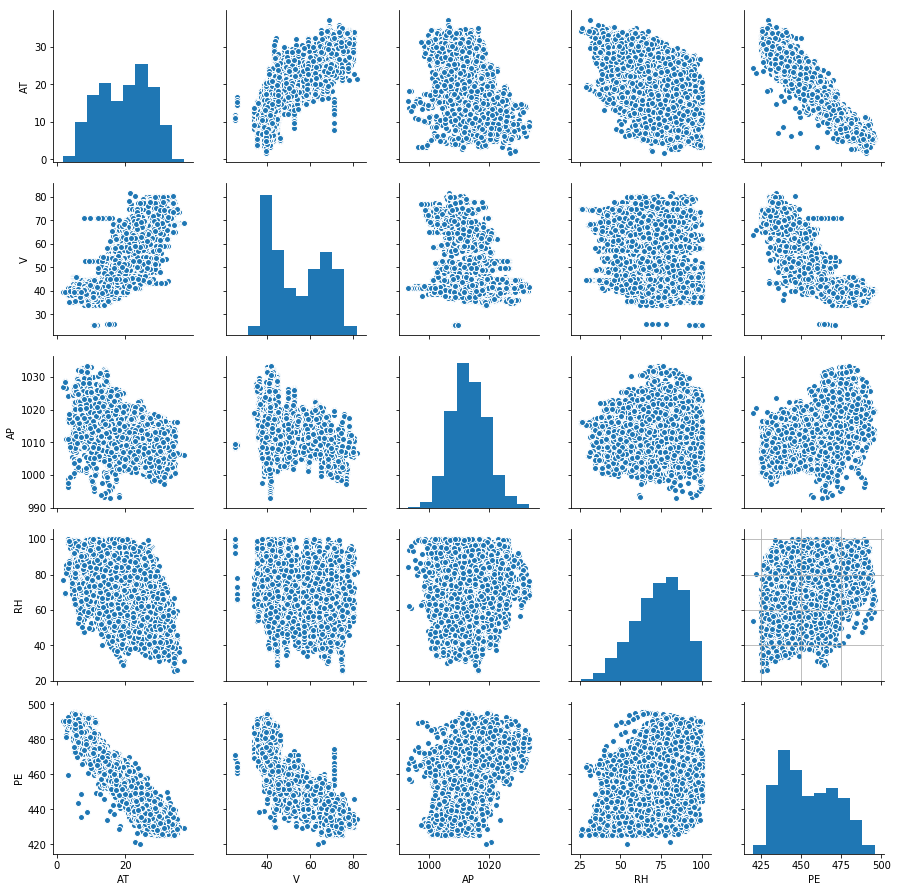

In [4]:
# b-ii
sns.pairplot(df)
plt.grid()
plt.show()

In [5]:
# correlation
df.corrwith(df.PE)

AT   -0.948128
V    -0.869780
AP    0.518429
RH    0.389794
PE    1.000000
dtype: float64

Describe your Findings:

Variable AT and Variable V seem to have linear relationship with Independent Variabl PE.

In [6]:
# b-iii
stat=df.describe()
stat

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [7]:
IQR= stat.iloc[6,:]- stat.iloc[4,:]
range = list(zip(stat.iloc[3,:], stat.iloc[7,:]))
range

[(1.81, 37.11),
 (25.36, 81.56),
 (992.89, 1033.3),
 (25.56, 100.16),
 (420.26, 495.76)]

In [8]:
stat.loc['iqr']=IQR.values
stat.loc['median']=stat.loc['50%']
stat.loc['range']= range

In [9]:
stat=stat.iloc[[1,-2,-1,4,6,8],:]
stat

,AT,V,AP,RH,PE
mean,19.6512,54.3058,1013.26,73.309,454.365
median,20.345,52.08,1012.94,74.975,451.55
range,"(1.81, 37.11)","(25.36, 81.56)","(992.89, 1033.3)","(25.56, 100.16)","(420.26, 495.76)"
25%,13.51,41.74,1009.1,63.3275,439.75
75%,25.72,66.54,1017.26,84.83,468.43
iqr,12.21,24.8,8.16,21.5025,28.68


In [10]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [12]:
# c simple linear regression check R-square and p-value
from sklearn.linear_model import LinearRegression
columns=df.columns.values
coe_sr = []
for i in columns[:-1]:
    X = df[i]
    Y = df['PE'].values
    import statsmodels.api as sm
    X2 = sm.add_constant(X)
    est = sm.OLS(Y, X2)
    est2 = est.fit()
    coe_sr.append(est2.params[[1][0]])
    print(est2.summary())
    
#    print(i,round(est2.rsquared,3),est2.pvalues)
    

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Sun, 03 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:09:18   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

## Description: 
AT - PE: R-Squared =0.899, p-value=0, statistically significant

V - PE: R-Squared =0.757, p-value=0, statistically significant

AP - PE: R-Squared =0.269, p-value=0, statistically significant

RH - PE: R-Squared =0.152, p-value=0, statistically significant
    
Conclusion: they are all significant.

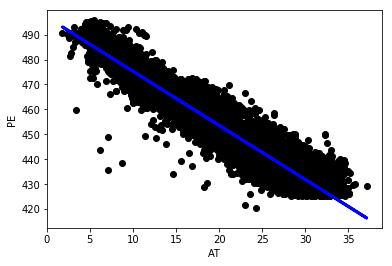

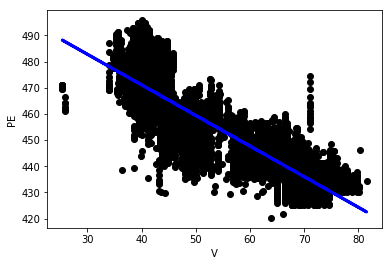

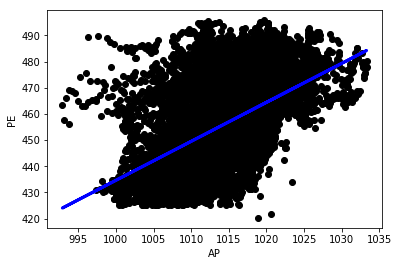

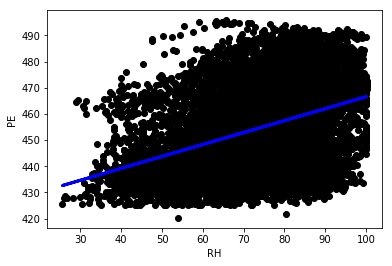

In [13]:
# c - plot
for i in columns[:-1]:
    pred=df[[i]]
    resp=df['PE']
    regr = LinearRegression()
    regr.fit(pred,resp)
    plt.scatter(pred,resp, color="black")
    plt.plot(pred, regr.predict(pred), linewidth = 3, color = "blue")
    plt.xlabel(i)
    plt.ylabel('PE')
    plt.show()
   

In [24]:
X = df['AT']
Y = df['PE'].values

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
#coe_sr.append(est2.params[[1][0]])
#print(est2.summary())
outliers = est2.get_influence()
#leverage = outliers.hat_matrix_diag
#dffits = outliers.dffits[0]
resid_stu = outliers.resid_studentized_external
#cook = outliers.cooks_distance[0]
covratio = outliers.cov_ratio

OUTLIER = pd.concat([pd.Series(resid_stu,name = 'resid_stu'),pd.Series(covratio, name = 'covratio'),],axis = 1)
EST2_outliers = pd.concat([X,OUTLIER], axis = 1)
EST2_outliers.head()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Sun, 03 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:39:58   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

,AT,resid_stu,covratio
0,14.96,-0.237981,1.000343
1,25.18,0.370422,1.000343
2,5.11,0.483236,1.000663
3,20.86,-0.969586,1.000120
4,10.82,0.066275,1.000460


In [25]:
outliers_ratio = sum(np.where((np.abs(EST2_outliers.resid_stu)>2),1,0))/EST2_outliers.shape[0]
outliers_ratio

0.04232859531772575

In [26]:
stat

,AT,V,AP,RH,PE
mean,19.6512,54.3058,1013.26,73.309,454.365
median,20.345,52.08,1012.94,74.975,451.55
range,"(1.81, 37.11)","(25.36, 81.56)","(992.89, 1033.3)","(25.56, 100.16)","(420.26, 495.76)"
25%,13.51,41.74,1009.1,63.3275,439.75
75%,25.72,66.54,1017.26,84.83,468.43
iqr,12.21,24.8,8.16,21.5025,28.68


Result Description: 
    
For the pair of PE and AT, simple linear regression model fits well. 

For the pair of PE and V, simple linear regression model fits relatively decently.

However, simple linear regression is not a good choice for PE/AP pair, and PE/RH pair.

Moreover, there is no obvious linear relationship seen for in the PE/AP pair, and PE/RH pair

In [34]:
# (d) fit a multiple regression model
X = df[['AT','V','AP','RH']]
Y = df['PE']
X2 = sm.add_constant(X)
est = sm.OLS(Y,X2)
est2 = est.fit()
print(est2.summary())
#coe_mr =[]


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sun, 03 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:15:15   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

In [35]:
coe_mr = est2.params.tolist()[1:]
coe_mr

[-1.9775131066353948,
 -0.233916422582498,
 0.06208294378085294,
 -0.15805410291641797]

## Description: 

r-squared = 0.929

P-values for all predictors are statistically siginificant.

We could not reject any of them.


In [36]:
# (e) 
y = coe_mr
x = coe_sr

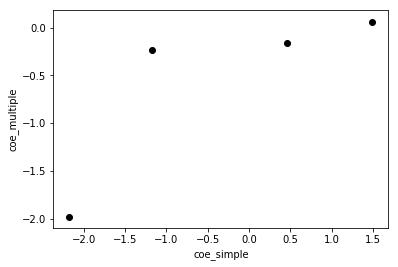

In [37]:
plt.scatter(x,y, color="black")
plt.xlabel('coe_simple')
plt.ylabel('coe_multiple')
plt.show()

In [38]:
df[['AT','V','AP','RH']].head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [39]:
# (f) nonlinear

for x in df[['AT','V','AP','RH']]:
    X = df[x]
    Y = df['PE']
    est = sm.OLS(Y,sm.add_constant(np.column_stack([X,X**2,X**3])))
    est2 = est.fit()
    print(est2.summary())

        

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Sun, 03 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:15:53   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

In [40]:
# g interaction
df['AT*V']= df['AT'] * df['V']
df['AT*AP']= df['AT'] * df['AP']
df['AT*RH']= df['AT'] * df['RH']
df['V*AP']= df['V'] * df['AP']
df['V*RH']= df['V'] * df['RH']
df['AP*RH']= df['AP'] * df['RH']

In [41]:
X = df[['AT','V','AP','RH','AT*V','AT*AP','AT*RH','V*AP','V*RH','AP*RH']]
Y = df['PE']
X2 = sm.add_constant(X)
est = sm.OLS(Y,X2)
est2 = est.fit()
print(est2.summary())
#est2.params

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Sun, 03 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:16:20   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

## Description: 
There is evidence of association of interactions of predictores with the response.
AT*V, AT*RH, V*AP

In [42]:
# h improve your model using interaction 
# randomly select 70% subset of the data
df['AT**2']= df['AT'] **2
df['AP**2']= df['AP'] **2
df['V**2']= df['V'] **2
df['RH**2']= df['RH'] **2
df.head()


,AT,V,AP,RH,PE,AT*V,AT*AP,AT*RH,V*AP,V*RH,AP*RH,AT**2,AP**2,V**2,RH**2
0,14.96,41.76,1024.07,73.17,463.26,624.7296,15320.0872,1094.6232,42765.1632,3055.5792,74931.2019,223.8016,1.048719e+06,1743.8976,5353.8489
1,25.18,62.96,1020.04,59.08,444.37,1585.3328,25684.6072,1487.6344,64221.7184,3719.6768,60263.9632,634.0324,1.040482e+06,3963.9616,3490.4464
2,5.11,39.40,1012.16,92.14,488.56,201.3340,5172.1376,470.8354,39879.1040,3630.3160,93260.4224,26.1121,1.024468e+06,1552.3600,8489.7796
3,20.86,57.32,1010.24,76.64,446.48,1195.6952,21073.6064,1598.7104,57906.9568,4393.0048,77424.7936,435.1396,1.020585e+06,3285.5824,5873.6896
4,10.82,37.50,1009.23,96.62,473.90,405.7500,10919.8686,1045.4284,37846.1250,3623.2500,97511.8026,117.0724,1.018545e+06,1406.2500,9335.4244


In [43]:
from sklearn.model_selection import train_test_split
random_subset,test_subset=train_test_split(df,test_size=0.3,random_state=42)
random_subset.head()

,AT,V,AP,RH,PE,AT*V,AT*AP,AT*RH,V*AP,V*RH,AP*RH,AT**2,AP**2,V**2,RH**2
8759,16.69,44.78,1010.41,58.18,456.17,747.3782,16863.7429,971.0242,45246.1598,2605.3004,58785.6538,278.5561,1.020928e+06,2005.2484,3384.9124
1434,24.12,58.66,1011.55,58.96,450.69,1414.8792,24398.5860,1422.1152,59337.5230,3458.5936,59640.9880,581.7744,1.023233e+06,3440.9956,3476.2816
7320,9.08,40.02,1031.20,75.34,476.69,363.3816,9363.2960,684.0872,41268.6240,3015.1068,77690.6080,82.4464,1.063373e+06,1601.6004,5676.1156
2579,9.60,41.82,1032.93,72.63,475.01,401.4720,9916.1280,697.2480,43197.1326,3037.3866,75021.7059,92.1600,1.066944e+06,1748.9124,5275.1169
9142,20.77,56.85,1012.40,83.63,442.85,1180.7745,21027.5480,1736.9951,57554.9400,4754.3655,84667.0120,431.3929,1.024954e+06,3231.9225,6993.9769


In [44]:
# 70 % data test 4 variables
X = random_subset[['AT','V','AP','RH']]
Y = random_subset['PE']
X2 = sm.add_constant(X)
est = sm.OLS(Y,X2)
est2 = est.fit()
print(est2.summary())
#est2.params

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Sun, 03 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:16:58   Log-Likelihood:                -19630.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6692   BIC:                         3.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        467.8414     11.502     40.673      0.0

In [45]:
from sklearn.metrics import mean_squared_error
pred=est2.predict(sm.add_constant(test_subset[['AT', 'V', 'AP', 'RH']]))
MSE4test= mean_squared_error(test_subset['PE'],pred)

pred=est2.predict(sm.add_constant(random_subset[['AT', 'V', 'AP', 'RH']]))
MSE4train= mean_squared_error(random_subset['PE'],pred)


In [47]:
#run a regression model involving all possible interaction terms 
#and quadratic nonlinearities, 
#remove insignicant variabls using p-values
random_subset.columns

Index(['AT', 'V', 'AP', 'RH', 'PE', 'AT*V', 'AT*AP', 'AT*RH', 'V*AP', 'V*RH',
       'AP*RH', 'AT**2', 'AP**2', 'V**2', 'RH**2'],
      dtype='object')

In [46]:
# with all interactions and quadratic nonlinearities
X = random_subset[['AT', 'V', 'AP', 'RH', 'AT*V', 'AT*AP', 'AT*RH', 'V*AP', 'V*RH','AP*RH', 'AT**2',  'AP**2', 'V**2', 'RH**2']]
Y = random_subset['PE']
X2 = sm.add_constant(X)
est = sm.OLS(Y,X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Sun, 03 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:17:05   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7664.9809   1429.568     -5.362      0.0

In [48]:
# delete "V*RH"
X = random_subset[['AT', 'V', 'AP', 'RH', 'AT*V', 'AT*AP', 'AT*RH', 'V*AP', 'AP*RH', 'AT**2',  'AP**2', 'V**2', 'RH**2']]
Y = random_subset['PE']
X2 = sm.add_constant(X)
est = sm.OLS(Y,X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7832.
Date:                Sun, 03 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:17:34   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6683   BIC:                         3.844e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7677.4947   1427.498     -5.378      0.0

In [49]:
# delete "V**2"
X = random_subset[['AT', 'V', 'AP', 'RH', 'AT*V', 'AT*AP', 'AT*RH', 'V*AP', 'AP*RH', 'AT**2',  'AP**2', 'RH**2']]
Y = random_subset['PE']
X2 = sm.add_constant(X)
est = sm.OLS(Y,X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     8486.
Date:                Sun, 03 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:17:42   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6684   BIC:                         3.844e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7693.6035   1427.075     -5.391      0.0

In [50]:
# delete "V*AP"
X = random_subset[['AT', 'V', 'AP', 'RH', 'AT*V', 'AT*AP', 'AT*RH',  'AP*RH', 'AT**2',  'AP**2', 'RH**2']]
Y = random_subset['PE']
X2 = sm.add_constant(X)
est = sm.OLS(Y,X2)
est2 = est.fit()
print(est2.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     9258.
Date:                Sun, 03 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:17:50   Log-Likelihood:                -19161.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6685   BIC:                         3.843e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7568.5210   1420.561     -5.328      0.0

In [51]:
# delete "AT*AP"
X = random_subset[['AT', 'V', 'AP', 'RH', 'AT*V',  'AT*RH',  'AP*RH', 'AT**2',  'AP**2', 'RH**2']]
Y = random_subset['PE']
X2 = sm.add_constant(X)
est = sm.OLS(Y,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Sun, 03 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:17:56   Log-Likelihood:                -19166.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6686   BIC:                         3.843e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.046e+04   1091.512     -9.581      0.0

In [52]:
from sklearn.metrics import mean_squared_error
pred=est2.predict(sm.add_constant(test_subset[['AT', 'V', 'AP', 'RH', 'AT*V',  'AT*RH',  'AP*RH', 'AT**2',  'AP**2', 'RH**2']]))
MSE10test= mean_squared_error(test_subset['PE'],pred)
MSE10test
pred=est2.predict(sm.add_constant(random_subset[['AT', 'V','AP', 'RH', 'AT*V', 'AT*RH', 'AP*RH', 'AT**2', 'AP**2',  'RH**2']]))
MSE10train= mean_squared_error(random_subset['PE'],pred)
MSE10train

17.917812671185718

In [53]:
print('MSE4test = ', round(MSE4test,3))
print('MSE4train = ', round(MSE4train,3))
print('MSE10test = ', round(MSE10test,3))
print('MSE10train = ', round(MSE10train,3))

MSE4test =  21.24
MSE4train =  20.581
MSE10test =  18.694
MSE10train =  17.918


In [54]:
# (i) KNN regression 
import matplotlib.pyplot as plt
from sklearn import neighbors
k_set = np.arange(1,101)
k_set

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [55]:
# i - for raw data, find best k to fit the model best.
X = random_subset[['AT','V','AP','RH']].values
Y = random_subset['PE'].values.ravel()
Xt = test_subset[['AT','V','AP','RH']].values
Yt = test_subset['PE'].values.ravel()
train_err=[]
test_err=[]
best_score = 0
optimal_k = 0
for k in k_set:
    knn = neighbors.KNeighborsRegressor(n_neighbors = k, weights='uniform')
    knn.fit(X,Y)
    if knn.score(Xt,Yt) > best_score:
        best_score = knn.score(Xt,Yt) 
        optimal_k = k
    train_err.append(1-knn.score(X,Y))
    test_err.append(1-knn.score(Xt,Yt))  
    
print ((1-best_score), optimal_k)
    

0.05364592369711796 5


##### Result:for raw features, k=5 fits the best.

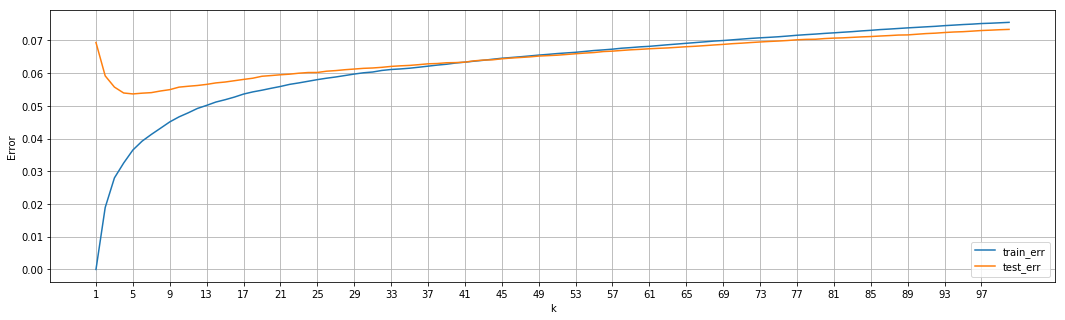

In [56]:
# plot err in terms of k
plt.figure(figsize=[18,5])
plt.plot(k_set,train_err,label='train_err')
plt.plot(k_set,test_err,label='test_err')
plt.xticks(k_set[::4])
#plt.yticks(np.arange(0,0.07,0.005))
plt.legend()
plt.grid()
plt.xlabel('k')
plt.ylabel('Error')
plt.show()

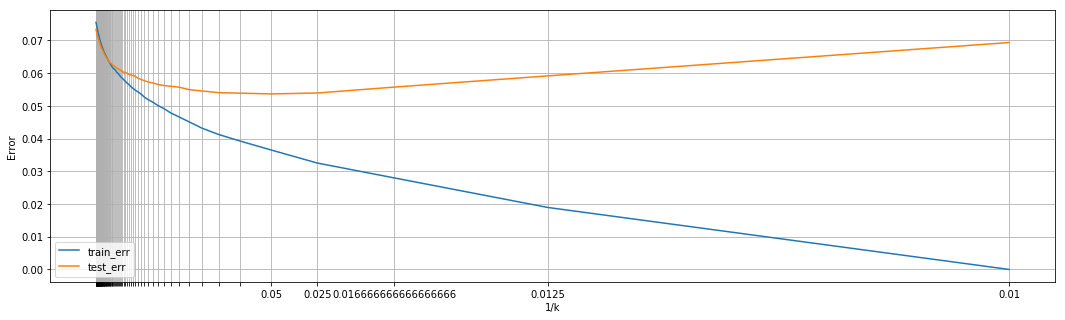

In [57]:
# plot test_err and train_err in terms of 1/k
k_new=1/(k_set)
plt.figure(figsize=[18,5])
plt.plot(k_new,train_err,label='train_err')
plt.plot(k_new,test_err,label='test_err')
plt.xticks(k_new,k_new[::-20])
plt.legend()
plt.grid()
plt.xlabel('1/k')
plt.ylabel('Error')
plt.show()


In [58]:
# for normalized data 
X = random_subset[['AT','V','AP','RH']].values
Y = random_subset['PE'].values.ravel()
Xt = test_subset[['AT','V','AP','RH']].values
Yt = test_subset['PE'].values.ravel()

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
Xt = scaler.transform(Xt)
Xt

array([[ 0.00218095, -0.48710194,  0.26514899,  0.11006243],
       [ 1.1642821 ,  1.18290186, -0.03750641, -2.1339947 ],
       [ 1.12653403,  1.02039794, -0.99423378,  0.13259861],
       ...,
       [-0.95769842, -1.00932324,  0.4786892 , -0.30105212],
       [-1.33113464, -1.05902104,  2.14665677,  0.7574654 ],
       [ 0.53739459,  0.76559812, -0.05600202,  0.936389  ]])

In [59]:
train_err=[]
test_err=[]
best_score = 0
optimal_k = 0
for k in k_set:
    knn = neighbors.KNeighborsRegressor(n_neighbors = k, weights='uniform')
    knn.fit(X,Y)
    if knn.score(Xt,Yt) > best_score:
        best_score = knn.score(Xt,Yt) 
        optimal_k = k
    train_err.append(1-knn.score(X,Y))
    test_err.append(1-knn.score(Xt,Yt))  
    
print ((1-best_score), optimal_k)

0.048798222270467595 4


### Result:for scaled features, k=4 fits the best.

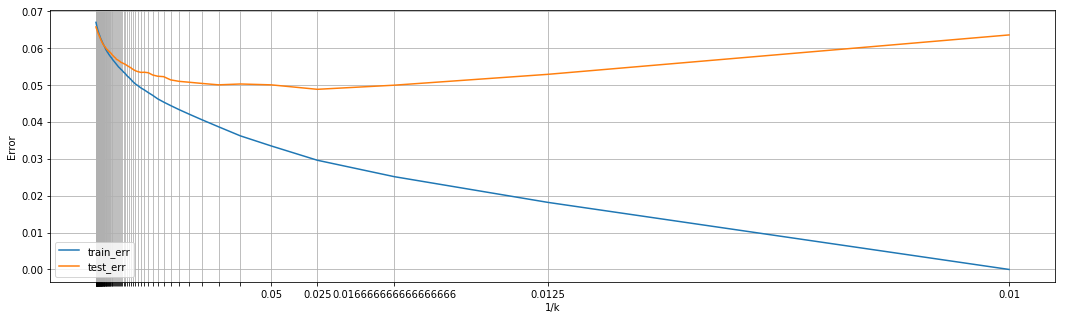

In [60]:
# for scaled features plot test_err and train_err
k_new=1/(k_set)
plt.figure(figsize=[18,5])
plt.plot(k_new,train_err,label='train_err')
plt.plot(k_new,test_err,label='test_err')
plt.xticks(k_new,k_new[::-20])
plt.legend()
plt.grid()
plt.xlabel('1/k')
plt.ylabel('Error')
plt.show()

### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

#best test err for linear regression is : r**2 = 0.938

In [61]:
knni = neighbors.KNeighborsRegressor(n_neighbors = 63, weights='uniform')
knni.fit(X,Y)
print (knni.score(Xt,Yt))

0.9380766079075632


In [64]:
knni = neighbors.KNeighborsRegressor(n_neighbors = 2, weights='uniform')
knni.fit(X,Y)
print (knni.score(Xt,Yt))

0.9471414391533177


# ISLR

In [65]:
# 2.4.7
# load data
list1=[[0,3,0,'red'],[2,0,0,'red'],[0,1,3,'red'],[0,1,2,'green'],[-1,0,1,'green'],[1,1,1,'red']]
#Obs. X1 X2 X3 Y
color = pd.DataFrame(list1,index=[1,2,3,4,5,6], columns = ['X1','X2','X3','Y'])
x_train=color[['X1','X2','X3']].values
y_train = color['Y'].values.ravel()
x_test = ([[0,0,0]])
color

,X1,X2,X3,Y
1,0,3,0,red
2,2,0,0,red
3,0,1,3,red
4,0,1,2,green
5,-1,0,1,green
6,1,1,1,red


In [66]:
vec1 = np.array(x_test)
vec2 = np.array(x_train)

In [67]:
# Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.
#(a) Compute the Euclidean distance between each observation and the test point,X1 =X2 =X3 =0.
for i in [0,1,2,3,4,5]:
    dist = np.linalg.norm(vec1 - vec2[i])
    print('obs=',i+1,'the distance is ',round(dist,3),'color =', color['Y'].iloc[i])


obs= 1 the distance is  3.0 color = red
obs= 2 the distance is  2.0 color = red
obs= 3 the distance is  3.162 color = red
obs= 4 the distance is  2.236 color = green
obs= 5 the distance is  1.414 color = green
obs= 6 the distance is  1.732 color = red


In [68]:
# (b) k=1 color?
# color = 'green' because when obs = 5, the distance is the shortest.

# (c) k=3, color?
# color = red because closest three obs = 5,6,2.  2 out 3 are 'red.'
k_ary = np.arange(1,6,1)
k_ary
from sklearn.neighbors import KNeighborsClassifier 
for k in k_ary:
    Ycolor = KNeighborsClassifier(n_neighbors=k, weights= 'uniform',metric = 'euclidean',p=2)
    Ycolor.fit(x_train,y_train)
    pred = Ycolor.predict(x_test)
    print('when k = ',k,pred)


when k =  1 ['green']
when k =  2 ['green']
when k =  3 ['red']
when k =  4 ['green']
when k =  5 ['red']


# d 
K should be small. Smaller K would bring more flexibilities since the model is highly non-linear, 
we need a flexible method.